# 📊 Exploratory Data Analysis (EDA)
## E-commerce Customer Behavior Dataset

Objectifs :
- Comprendre la structure des données
- Identifier la variable cible
- Analyser les distributions
- Détecter les valeurs manquantes et outliers
- Préparer les données pour le modeling


## ÉTAPE 1 : Compréhension globale du dataset

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")


In [ ]:
DATA_PATH = Path("ecommerce_customer_churn_dataset.csv")

df = pd.read_csv(DATA_PATH)
df.head()


,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,94.72,34.0,46.40,2.0,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,82.45,71.0,57.96,9.2,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,165.52,11.0,12.24,11.5,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,147.33,47.0,44.10,5.4,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,32.5,141.30,73.0,25.20,5.5,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [ ]:
df.shape

(50000, 25)

=> Le dataset est de taille conséquente (50 000 lignes), ce qui le rend suffisamment représentatif pour entraîner des modèles de Machine Learning robustes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

PRÉSENTATION ET DESCRIPTION DÉTAILLÉE DES FEATURES

In [ ]:
# Description des features pour votre dataset
features_description = {
    'Age': {
        'Type': 'Float',
        'Description': 'Âge du client',
        'Utilité': 'Analyse démographique, segmentation'
    },
    'Gender': {
        'Type': 'Categorical',
        'Description': 'Genre du client (M/F)',
        'Utilité': 'Analyse démographique, segmentation'
    },
    'Country': {
        'Type': 'Categorical',
        'Description': 'Pays de résidence',
        'Utilité': 'Analyse géographique, patterns internationaux'
    },
    'City': {
        'Type': 'Categorical',
        'Description': 'Ville de résidence',
        'Utilité': 'Analyse géographique et segmentation locale'
    },
    'Membership_Years': {
        'Type': 'Float',
        'Description': 'Nombre d\'années d\'adhésion',
        'Utilité': 'Analyse de la fidélité et du churn'
    },
    'Login_Frequency': {
        'Type': 'Float',
        'Description': 'Fréquence moyenne de connexion',
        'Utilité': 'Analyse de l\'engagement utilisateur'
    },
    'Session_Duration_Avg': {
        'Type': 'Float',
        'Description': 'Durée moyenne des sessions (minutes)',
        'Utilité': 'Analyse de l\'engagement'
    },
    'Pages_Per_Session': {
        'Type': 'Float',
        'Description': 'Nombre moyen de pages vues par session',
        'Utilité': 'Analyse de l\'engagement et comportement utilisateur'
    },
    'Cart_Abandonment_Rate': {
        'Type': 'Float',
        'Description': 'Taux d\'abandon de panier',
        'Utilité': 'Indicateur clé pour la conversion'
    },
    'Wishlist_Items': {
        'Type': 'Float',
        'Description': 'Nombre moyen d\'articles dans la wishlist',
        'Utilité': 'Analyse d\'intérêt et comportements d\'achat'
    },
    'Total_Purchases': {
        'Type': 'Float',
        'Description': 'Nombre total d\'achats',
        'Utilité': 'Analyse de valeur client et fidélité'
    },
    'Average_Order_Value': {
        'Type': 'Float',
        'Description': 'Valeur moyenne des commandes',
        'Utilité': 'Analyse économique et segmentation'
    },
    'Days_Since_Last_Purchase': {
        'Type': 'Float',
        'Description': 'Nombre de jours depuis le dernier achat',
        'Utilité': 'Analyse du churn potentiel'
    },
    'Discount_Usage_Rate': {
        'Type': 'Float',
        'Description': 'Taux d\'utilisation des remises',
        'Utilité': 'Analyse comportementale et promotionnelle'
    },
    'Returns_Rate': {
        'Type': 'Float',
        'Description': 'Taux de retours',
        'Utilité': 'Analyse qualité produit et satisfaction'
    },
    'Email_Open_Rate': {
        'Type': 'Float',
        'Description': 'Taux d\'ouverture des emails marketing',
        'Utilité': 'Analyse engagement marketing'
    },
    'Customer_Service_Calls': {
        'Type': 'Float',
        'Description': 'Nombre d\'appels au service client',
        'Utilité': 'Analyse satisfaction et problèmes rencontrés'
    },
    'Product_Reviews_Written': {
        'Type': 'Float',
        'Description': 'Nombre d\'avis produits écrits',
        'Utilité': 'Analyse de l\'engagement et feedback'
    },
    'Social_Media_Engagement_Score': {
        'Type': 'Float',
        'Description': 'Score d\'engagement sur les réseaux sociaux',
        'Utilité': 'Analyse comportementale'
    },
    'Mobile_App_Usage': {
        'Type': 'Float',
        'Description': 'Utilisation de l\'application mobile',
        'Utilité': 'Analyse d\'engagement digital'
    },
    'Payment_Method_Diversity': {
        'Type': 'Float',
        'Description': 'Diversité des méthodes de paiement utilisées',
        'Utilité': 'Analyse de comportements financiers'
    },
    'Lifetime_Value': {
        'Type': 'Float',
        'Description': 'Valeur totale du client sur sa durée de vie',
        'Utilité': 'Analyse économique et segmentation'
    },
    'Credit_Balance': {
        'Type': 'Float',
        'Description': 'Solde du crédit disponible',
        'Utilité': 'Analyse financière du client'
    },
    'Churned': {
        'Type': 'Binary (0/1)',
        'Description': 'Client churné ou non',
        'Utilité': 'Variable cible pour la modélisation'
    },
    'Signup_Quarter': {
        'Type': 'Categorical',
        'Description': 'Trimestre d\'inscription',
        'Utilité': 'Analyse saisonnière et comportementale'
    }
}

# Affichage formaté
for feature, info in features_description.items():
    print(f"\n📌 {feature}")
    print(f"   Type: {info['Type']}")
    print(f"   Description: {info['Description']}")



📌 Age
   Type: Float
   Description: Âge du client

📌 Gender
   Type: Categorical
   Description: Genre du client (M/F)

📌 Country
   Type: Categorical
   Description: Pays de résidence

📌 City
   Type: Categorical
   Description: Ville de résidence

📌 Membership_Years
   Type: Float
   Description: Nombre d'années d'adhésion

📌 Login_Frequency
   Type: Float
   Description: Fréquence moyenne de connexion

📌 Session_Duration_Avg
   Type: Float
   Description: Durée moyenne des sessions (minutes)

📌 Pages_Per_Session
   Type: Float
   Description: Nombre moyen de pages vues par session

📌 Cart_Abandonment_Rate
   Type: Float
   Description: Taux d'abandon de panier

📌 Wishlist_Items
   Type: Float
   Description: Nombre moyen d'articles dans la wishlist

📌 Total_Purchases
   Type: Float
   Description: Nombre total d'achats

📌 Average_Order_Value
   Type: Float
   Description: Valeur moyenne des commandes

📌 Days_Since_Last_Purchase
   Type: Float
   Description: Nombre de jours depuis

Types de variables :

**Variables numériques** : 21

float64 : 20

int64 : 1 (Churned)

**Variables catégorielles** : 4

Gender, Country, City, Signup_Quarter



=> Le dataset est majoritairement numérique, ce qui est favorable pour les algorithmes de classification.

La présence de variables catégorielles impose néanmoins une phase de preprocessing (encodage), qui sera traitée dans la phase de modeling

**Variable cible (Churned)**

Churned ∈ {0, 1}

Moyenne = 0.289

**=>**  ≈ 28.9 % des clients ont churné

=> La variable cible est binaire, ce qui confirme que le problème est un problème de classification supervisée.

=> Le dataset présente un déséquilibre modéré des classes, avec environ 29 % de churners contre 71 % de non-churners.

=> Ce déséquilibre devra être pris en compte lors de l’évaluation (precision, recall, F1-score).

**Valeurs manquantes**

Plusieurs variables contiennent des valeurs manquantes, par exemple :

Age → ~2 500 valeurs manquantes , Session_Duration_Avg

, Wishlist_Items, Returns_Rate,Social_Media_Engagement_Score ,Credit_Balance,...

-> Aucune colonne n’est totalement vide

=> Le dataset contient des valeurs manquantes réparties sur plusieurs variables numériques, ce qui est courant dans des données comportementales réelles.

=> Aucune variable ne présente un taux de valeurs manquantes critique (>50 %), ce qui signifie que toutes les variables peuvent être conservées. -> Une stratégie d’imputation sera nécessaire lors du preprocessing.

In [ ]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,46500.000000,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,41.997485,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,21.373642,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,25.300000,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,57.000000,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


Points importants observés dans describe() :

**Age :**

min = 5, max = 200 → valeurs irréalistes

**Total_Purchases :**

min = -13 → impossible

**Average_Order_Value :**

max ≈ 9666 → outliers importants

**Membership_Years max** = 10 → cohérent

=> Certaines variables présentent des valeurs aberrantes (outliers), probablement dues à des erreurs de saisie ou à des cas extrêmes.

Ces anomalies devront être analysées visuellement avant toute décision (suppression, capping, transformation).



## ÉTAPE 2 : Contrôle de qualité des données

### 2.1. Analyse des valeurs manquantes (quantitative)

Avant toute analyse exploratoire approfondie, il est indispensable d’évaluer la qualité des données, notamment la présence de valeurs manquantes, car elles peuvent biaiser les statistiques descriptives et les modèles prédictifs.

In [ ]:
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

missing_df[missing_df["missing_count"] > 0]


,missing_count,missing_percent
Social_Media_Engagement_Score,6000,12.000
Credit_Balance,5500,11.000
Mobile_App_Usage,5000,10.000
Returns_Rate,4491,8.982
Wishlist_Items,4000,8.000
Product_Reviews_Written,3500,7.000
Discount_Usage_Rate,3500,7.000
Session_Duration_Avg,3399,6.798
Pages_Per_Session,3000,6.000
Days_Since_Last_Purchase,3000,6.000


### 2.2. Visualisation des valeurs manquantes

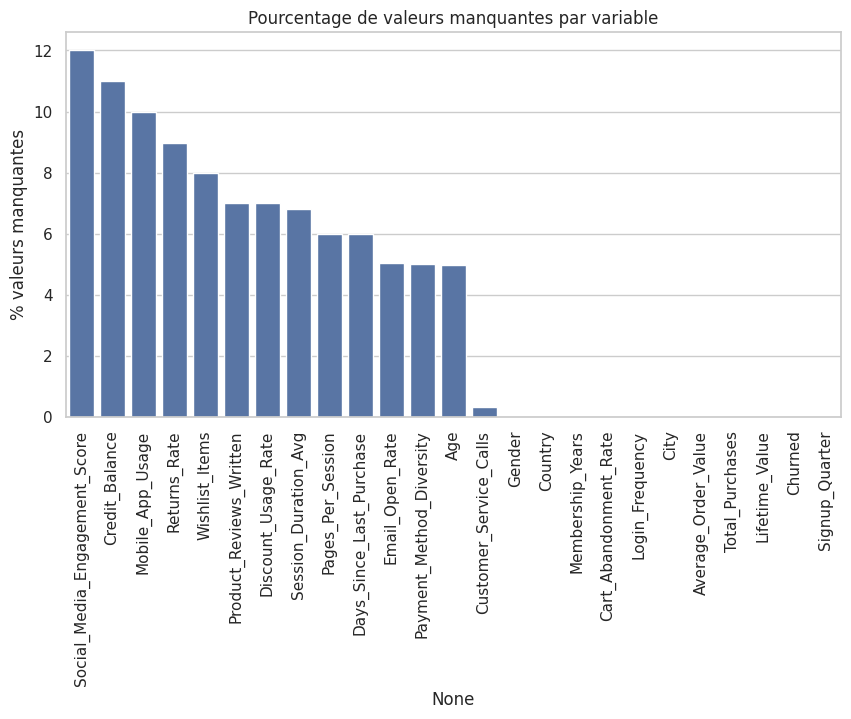

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=missing_df.index,
    y=missing_df["missing_percent"]
)
plt.xticks(rotation=90)
plt.title("Pourcentage de valeurs manquantes par variable")
plt.ylabel("% valeurs manquantes")
plt.show()


**L’analyse des valeurs manquantes montre que :**

* Les taux de valeurs manquantes varient entre 0 % et 12 %

**Les variables les plus affectées sont :**

* Social_Media_Engagement_Score (~12 %)

* Credit_Balance (~11 %)

* Mobile_App_Usage (~10 %)

* Returns_Rate (~9 %)

* Wishlist_Items, Product_Reviews_Written, Discount_Usage_Rate (~7–8 %)

**À l’inverse :**

Les variables démographiques et transactionnelles de base (Gender, Country, Membership_Years, Total_Purchases, Lifetime_Value, Churned, etc.) ne présentent aucune valeur manquante.

=> L’analyse des valeurs manquantes révèle que celles-ci concernent principalement des variables liées à l’engagement et au comportement utilisateur.

=> Aucune variable ne dépasse un seuil critique de valeurs manquantes (généralement fixé entre 30 % et 40 %), ce qui permet de conserver l’ensemble des variables pour la suite de l’étude.

=> Les données manquantes seront traitées ultérieurement à l’aide de méthodes d’imputation adaptées lors de la phase de preprocessing.

## ÉTAPE 3 : Analyse de la variable cible

### 3.1. Distribution de Churned

In [ ]:
df["Churned"].value_counts()


,count
Churned,
0,35550
1,14450


In [ ]:
df["Churned"].value_counts(normalize=True)


,proportion
Churned,
0,0.711
1,0.289


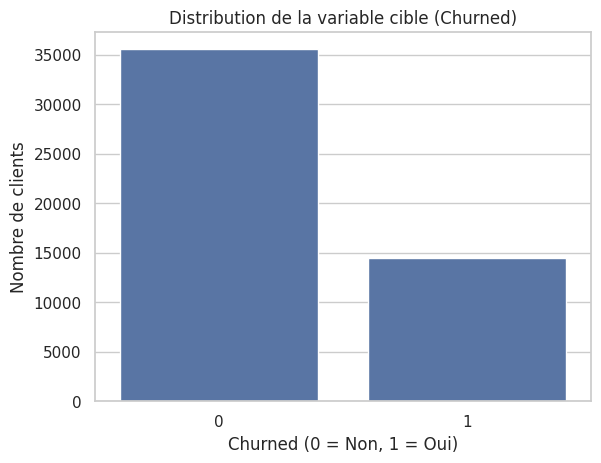

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="Churned", data=df)
plt.title("Distribution de la variable cible (Churned)")
plt.xlabel("Churned (0 = Non, 1 = Oui)")
plt.ylabel("Nombre de clients")
plt.show()


**Clients non churnés (Churned = 0) :**
35 550 observations → 71,1 %

**Clients churnés (Churned = 1) :**
14 450 observations → 28,9 %

=> L’analyse de la variable cible met en évidence un déséquilibre des classes, avec une majorité de clients non churnés représentant environ 71 % du dataset, contre 29 % de clients churnés.


## ÉTAPE 4: Analyse univariée

### 4.1 Variables numériques (distribution)

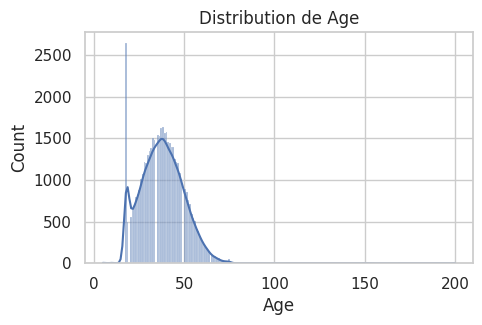

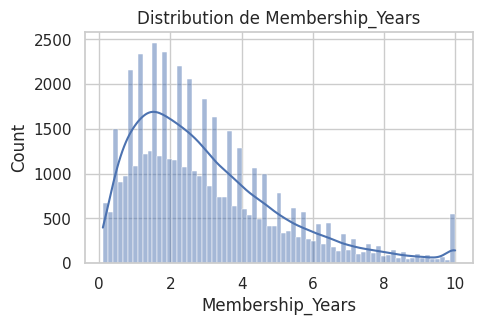

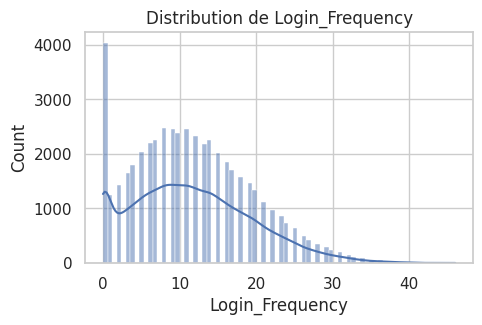

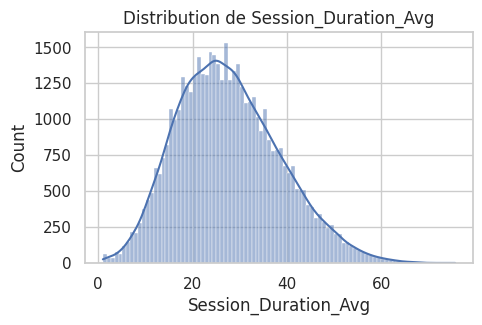

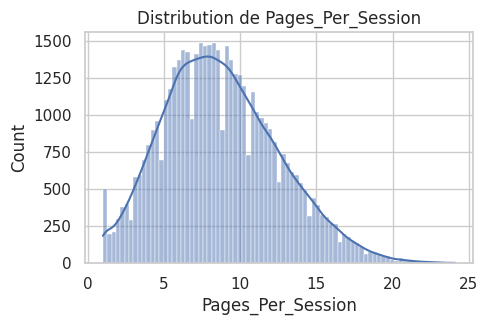

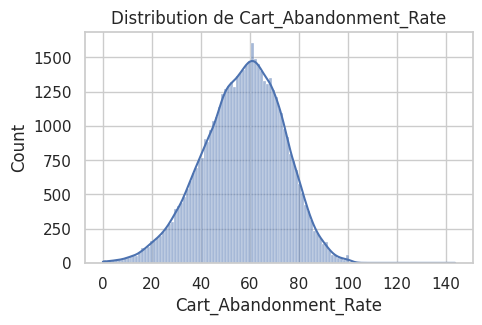

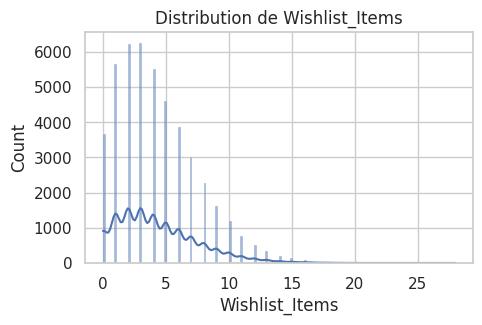

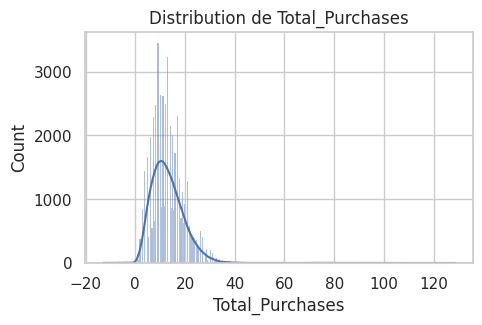

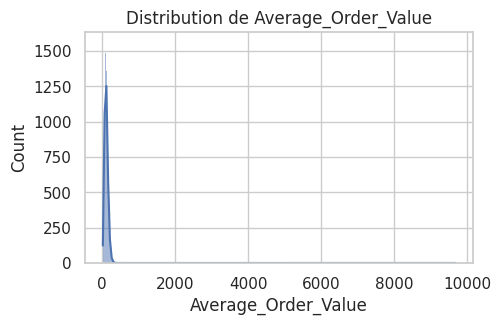

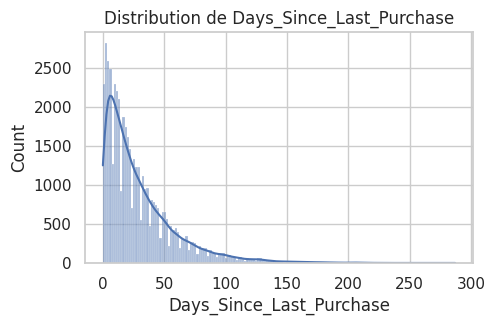

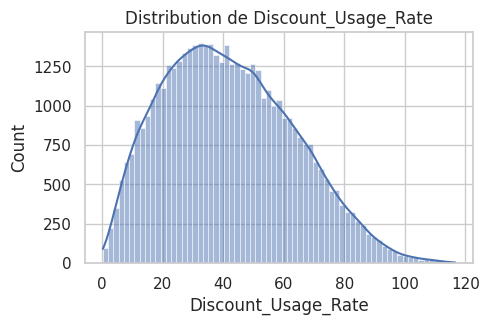

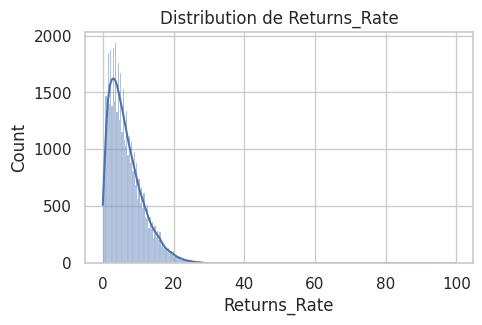

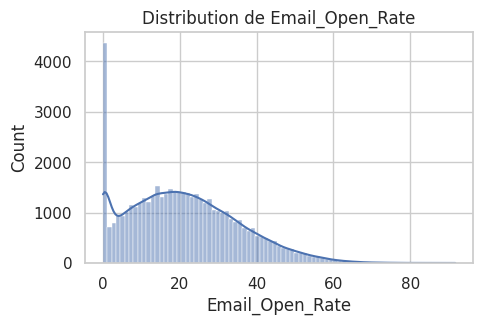

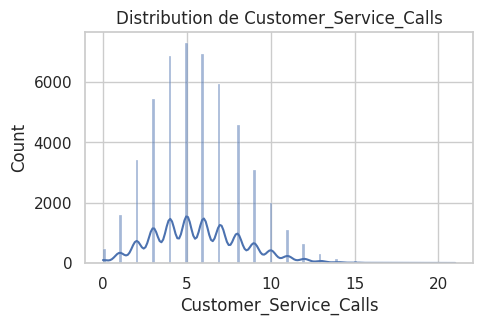

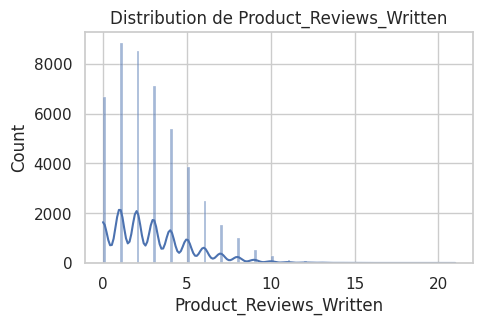

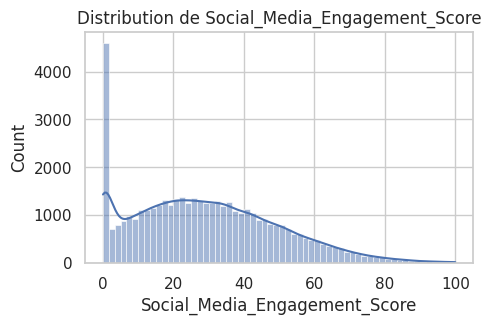

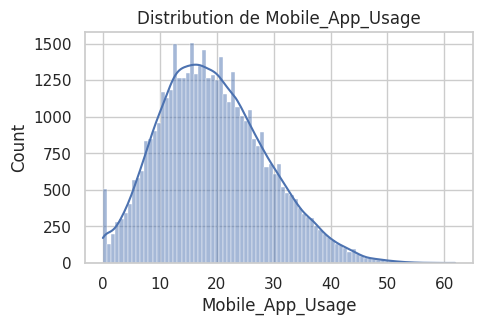

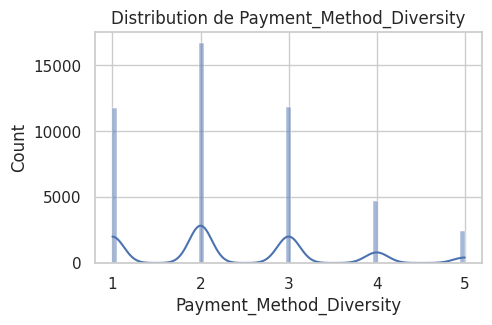

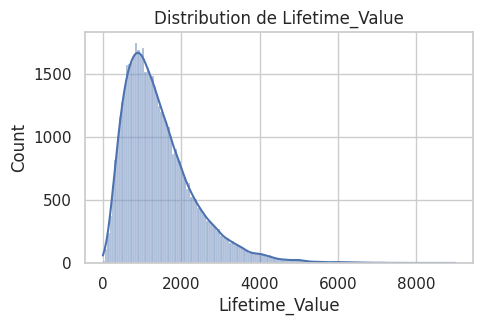

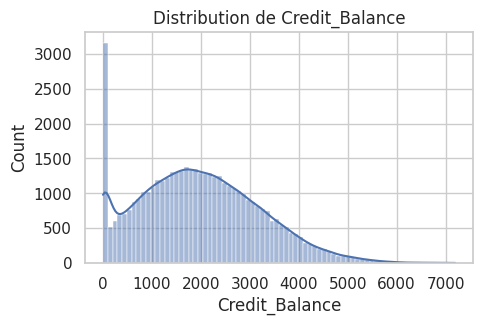

In [ ]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Churned")

for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution de {col}")
    plt.show()


=> L’analyse univariée des variables numériques montre que la majorité des distributions sont fortement asymétriques à droite, avec une concentration importante des observations sur de faibles valeurs et des queues longues traduisant la présence de valeurs extrêmes.

**Interprétation par groupes de variables :**

* Variables démographiques

**Age**: distribution fortement asymétrique à droite, avec la majorité des clients âgés de 20 à 50 ans.

Présence de valeurs irréalistes (>100 ans), suggérant des outliers ou erreurs de saisie.

=> Ces valeurs devront être traitées lors du preprocessing (filtrage ou capping).

* Variables d’engagement et d’usage

**Login_Frequency, Session_Duration_Avg, Pages_Per_Session, Mobile_App_Usage :**

Distributions asymétriques à droite, indiquant que la majorité des clients ont une activité modérée, tandis qu’une minorité présente un usage intensif.

=> Ces variables pourraient bénéficier de transformations (log, robust scaling) lors du modeling.

* Variables transactionnelles

**Total_Purchases, Average_Order_Value, Lifetime_Value, Credit_Balance :**

Distributions fortement asymétriques avec des valeurs extrêmes importantes.

Présence de valeurs aberrantes (ex : AOV très élevé).

=> Ces variables sont informatives mais sensibles aux outliers.

* Variables de comportement post-achat

**Cart_Abandonment_Rate, Discount_Usage_Rate :**

Distributions plus régulières, proches d’une forme unimodale.

**Returns_Rate, Days_Since_Last_Purchase :**

Forte concentration à 0 ou à de faibles valeurs, traduisant des comportements client hétérogènes.

* Variables d’interaction client

**Customer_Service_Calls, Product_Reviews_Written, Wishlist_Items :**

Distributions fortement asymétriques avec une majorité de zéros, ce qui reflète un faible niveau d’interaction pour la plupart des clients.

* Variables discrètes

**Payment_Method_Diversity :**

Variable discrète avec une majorité de clients utilisant une seule méthode de paiement.

### 4.2 Variables catégorielles

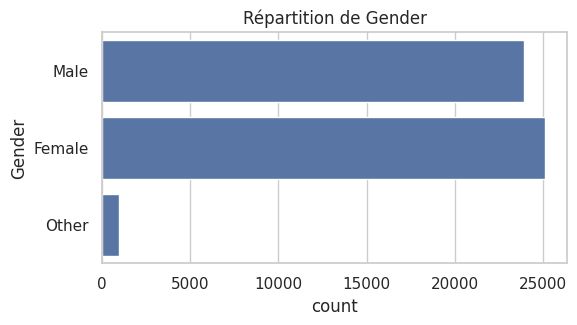

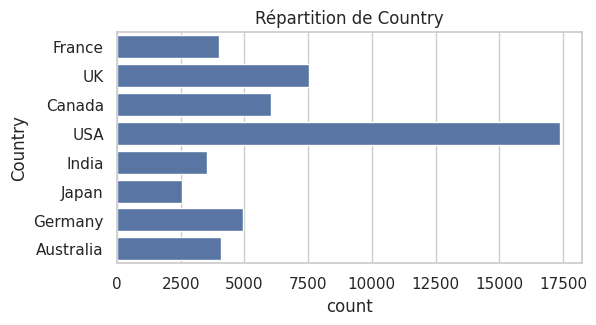

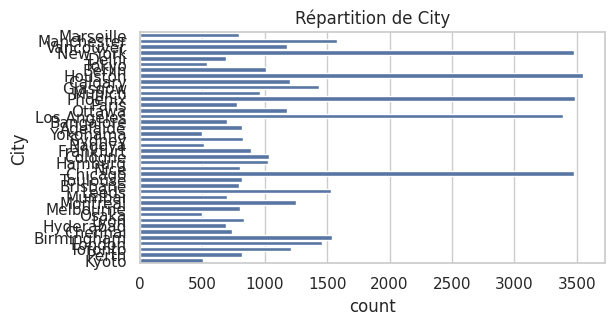

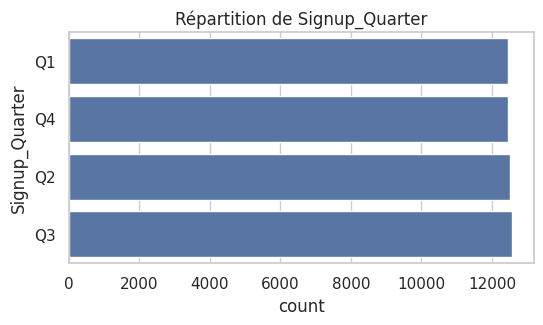

In [ ]:
categorical_cols = df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    plt.figure(figsize=(6, 3))
    sns.countplot(y=col, data=df)
    plt.title(f"Répartition de {col}")
    plt.show()


**Analyse univariée des variables catégorielles**
* **Variable Gender**

La répartition par genre est globalement équilibrée entre les catégories Male et Female, qui représentent chacune près de la moitié des clients.

La catégorie Other est très faiblement représentée.

=> Cette variable ne présente pas de biais de représentation majeur et peut être intégrée telle quelle dans les modèles, avec un encodage adapté.

* **Variable Country**

La distribution par pays montre une forte domination des États-Unis, suivis du Canada et du Royaume-Uni.

Les autres pays sont représentés de manière plus modérée, avec une diversité géographique notable.

=> Cette variable est potentiellement informative mais présente un déséquilibre de catégories, ce qui devra être pris en compte lors de l’encodage (ex. one-hot encoding avec gestion des catégories rares).

* **Variable City**

La variable City présente une forte dispersion géographique, avec un grand nombre de modalités et aucune ville ultra-dominante.

Cette structure est typique des variables à forte cardinalité.

=> Bien que potentiellement informative, cette variable peut augmenter la complexité du modèle. Une stratégie spécifique pourra être envisagée (regroupement, encodage fréquentiel ou target encoding).

* **Variable Signup_Quarter**

La répartition par trimestre d’inscription est relativement équilibrée, avec une légère surreprésentation du premier trimestre (Q1) et une légère sous-représentation du troisième trimestre (Q3).

=> Cette variable est stable et bien répartie, ce qui en fait une variable temporelle exploitable sans risque de biais majeur.





**L’analyse univariée des variables catégorielles montre une diversité de profils clients, sans déséquilibre critique.**

**Certaines variables présentent une forte cardinalité (notamment City), ce qui justifiera un choix d’encodage adapté lors de la phase de preprocessing.**

### ÉTAPE 5 : Analyse bivariée (feature vs cible)

5.1 Numérique vs Churned

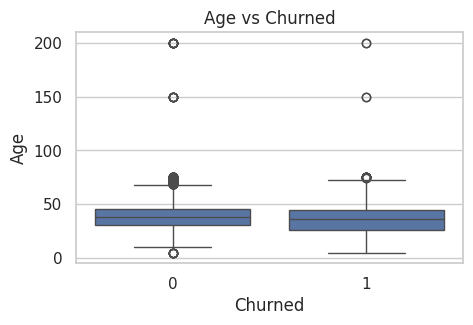

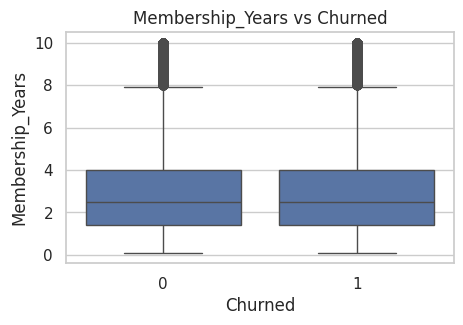

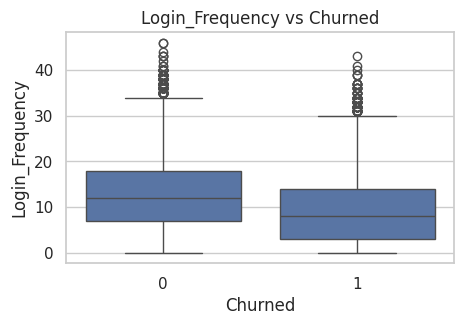

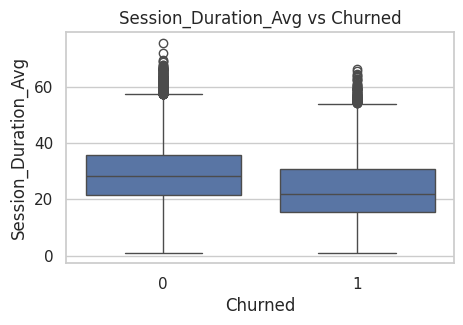

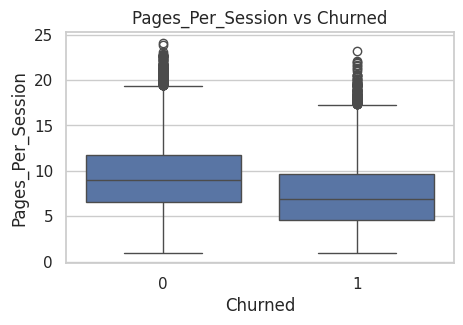

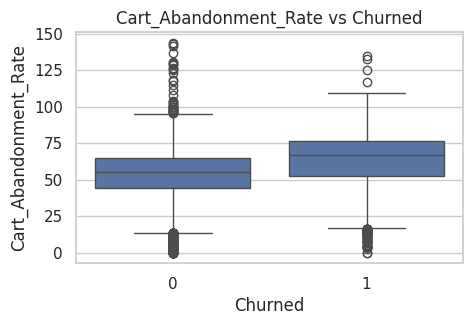

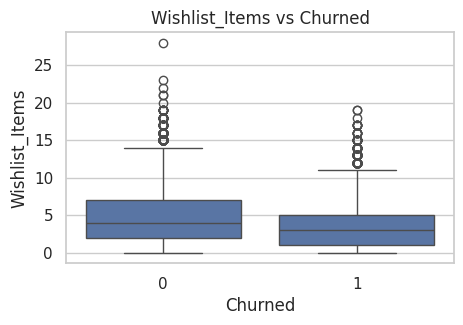

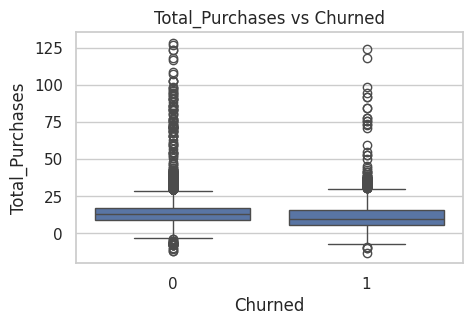

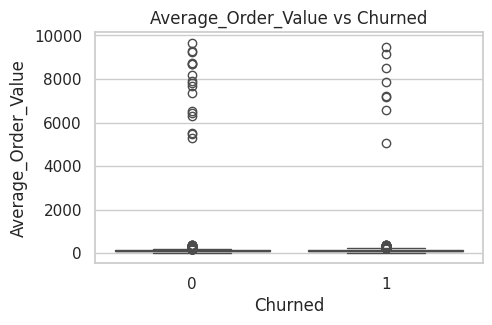

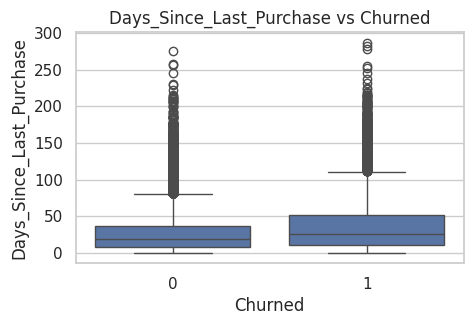

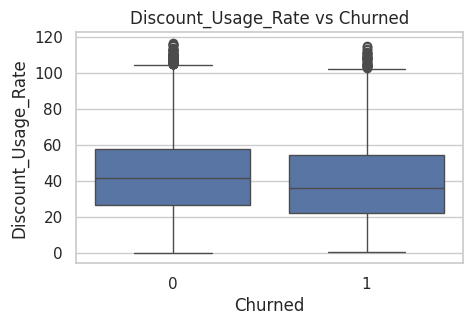

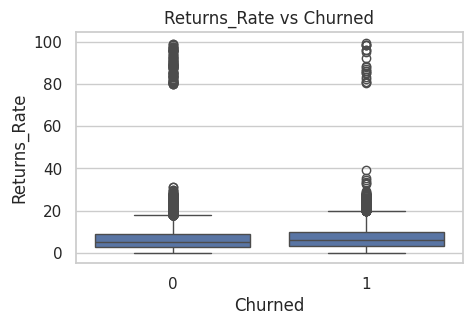

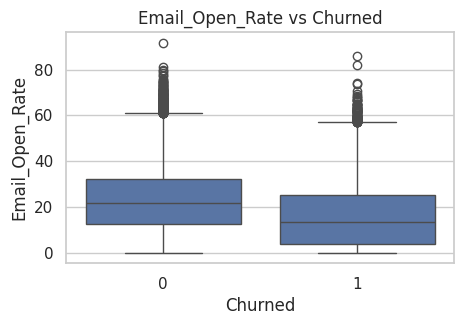

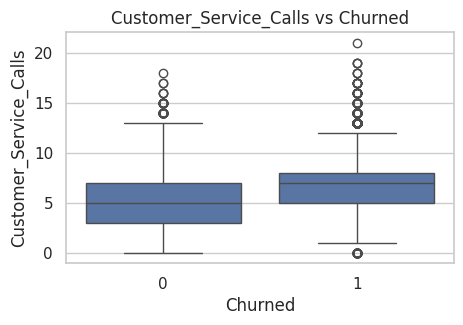

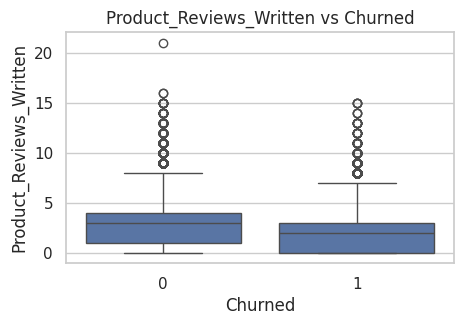

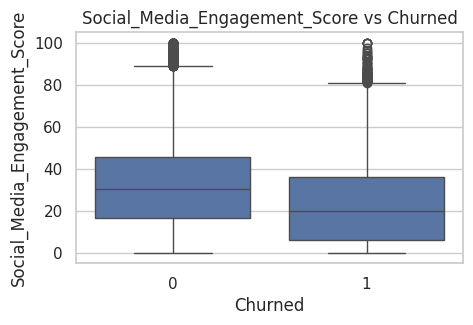

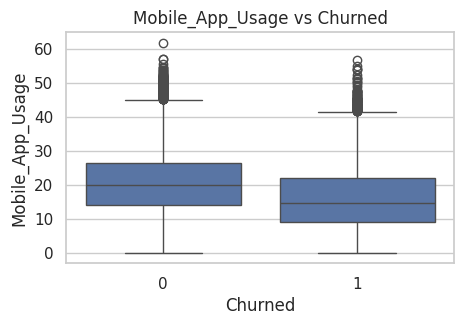

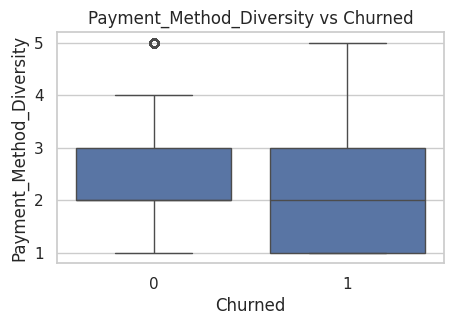

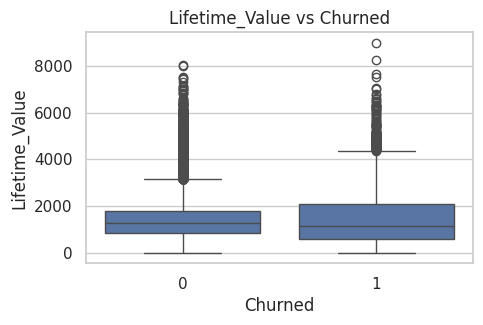

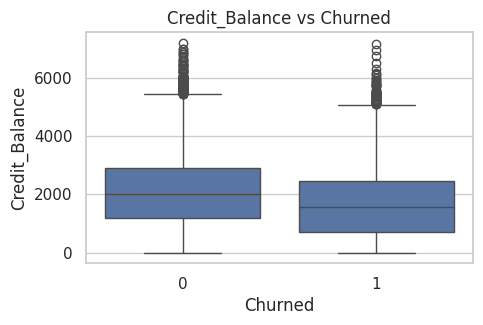

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x="Churned", y=col, data=df)
    plt.title(f"{col} vs Churned")
    plt.show()


* Très peu de différences visibles entre les clients churnés et non churnés sur
la majorité des variables prises individuellement.

* Les distributions sont extrêmement similaires pour presque toutes les features (médianes, quartiles et dispersions proches).

* Total_Purchases et Lifetime_Value légèrement plus élevés chez les non-churnés.
Quelques variables d'engagement (Login_Frequency, Reviews, etc.) montrent de très faibles écarts.

=> Cela suggère que les relations avec le churn sont soit faibles, soit non linéaires, ou que le churn dépend de combinaisons de variables plutôt que d'une seule.

Détails par variable :

**Age, Membership_Years, Login_Frequency, Session_Duration_Avg, Pages_Per_Session, Cart_Abandonment_Rate, Wishlist_Items, Average_Order_Value, Days_Since_Last_Purchase, Discount_Usage_Rate, Returns_Rate, Email_Open_Rate, Customer_Service_Calls, Social_Media_Engagement_Score, Mobile_App_Usage, Payment_Method_Diversity, Credit_Balance** :

=> Aucune différence notable – distributions quasi identiques.

**Total_Purchases et Lifetime_Value**: Légère tendance – valeurs médianes et globales un peu plus élevées chez les non-churnés, mais chevauchement important (signal faible).

**Product_Reviews_Written** : Très légère tendance à plus d’avis chez les non-churnés (signal très faible).


=> Aucune variable numérique seule ne sépare clairement les clients churnés des non-churnés.

Le churn ne semble pas dépendre fortement d’une seule métrique comportementale ou démographique prise isolément.

### 5.2 Catégoriel vs Churned

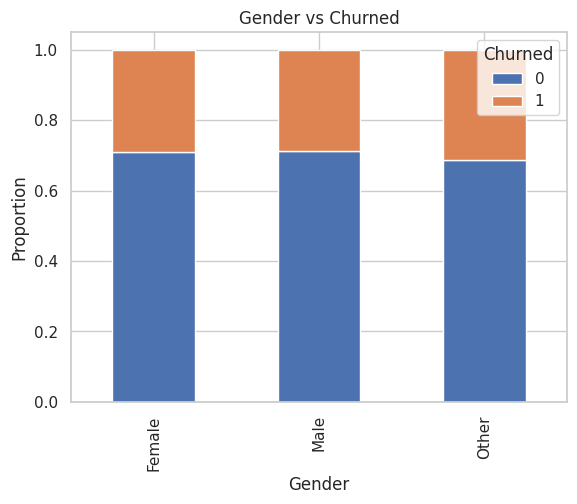

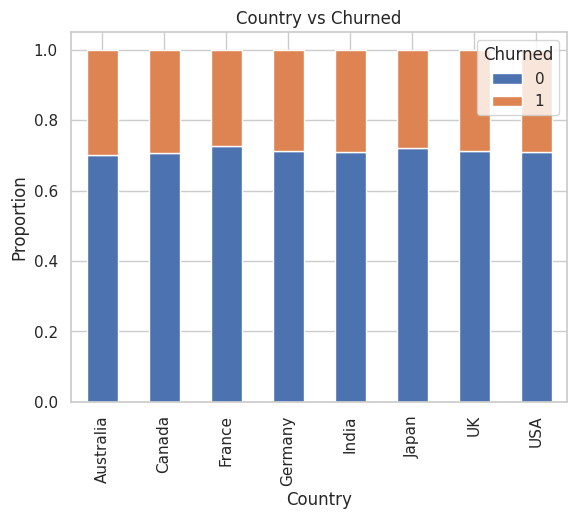

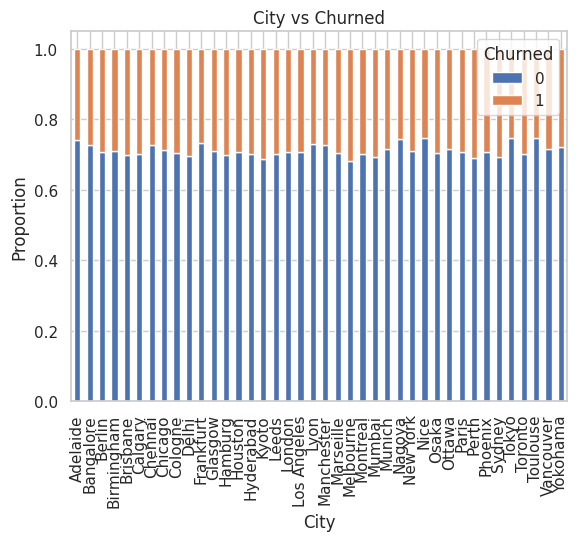

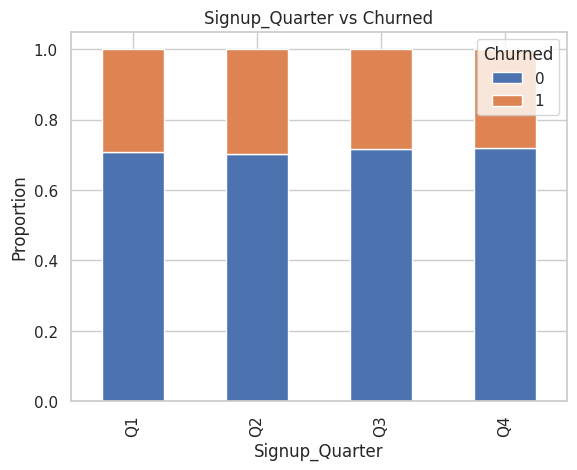

In [ ]:
for col in categorical_cols:
    cross = pd.crosstab(df[col], df["Churned"], normalize="index")
    cross.plot(kind="bar", stacked=True)
    plt.title(f"{col} vs Churned")
    plt.ylabel("Proportion")
    plt.show()


Détails par variable :

**Gender (Female, Male, Other)** : Taux de churn pratiquement identique (~30 %) pour tous les genres.

**Country (USA, Canada, UK, France, India, Japan, Germany, Australia, etc.)** : Taux de churn identique dans tous les pays affichés (~30 %).

**City (toutes les villes listées)** : Taux de churn très stable d’une ville à l’autre, avec seulement de minuscules variations aléatoires.

=> Les variables démographiques et géographiques classiques (genre, pays, ville) n’ont aucune influence visible sur le churn.

### ÉTAPE 6 : Corrélation

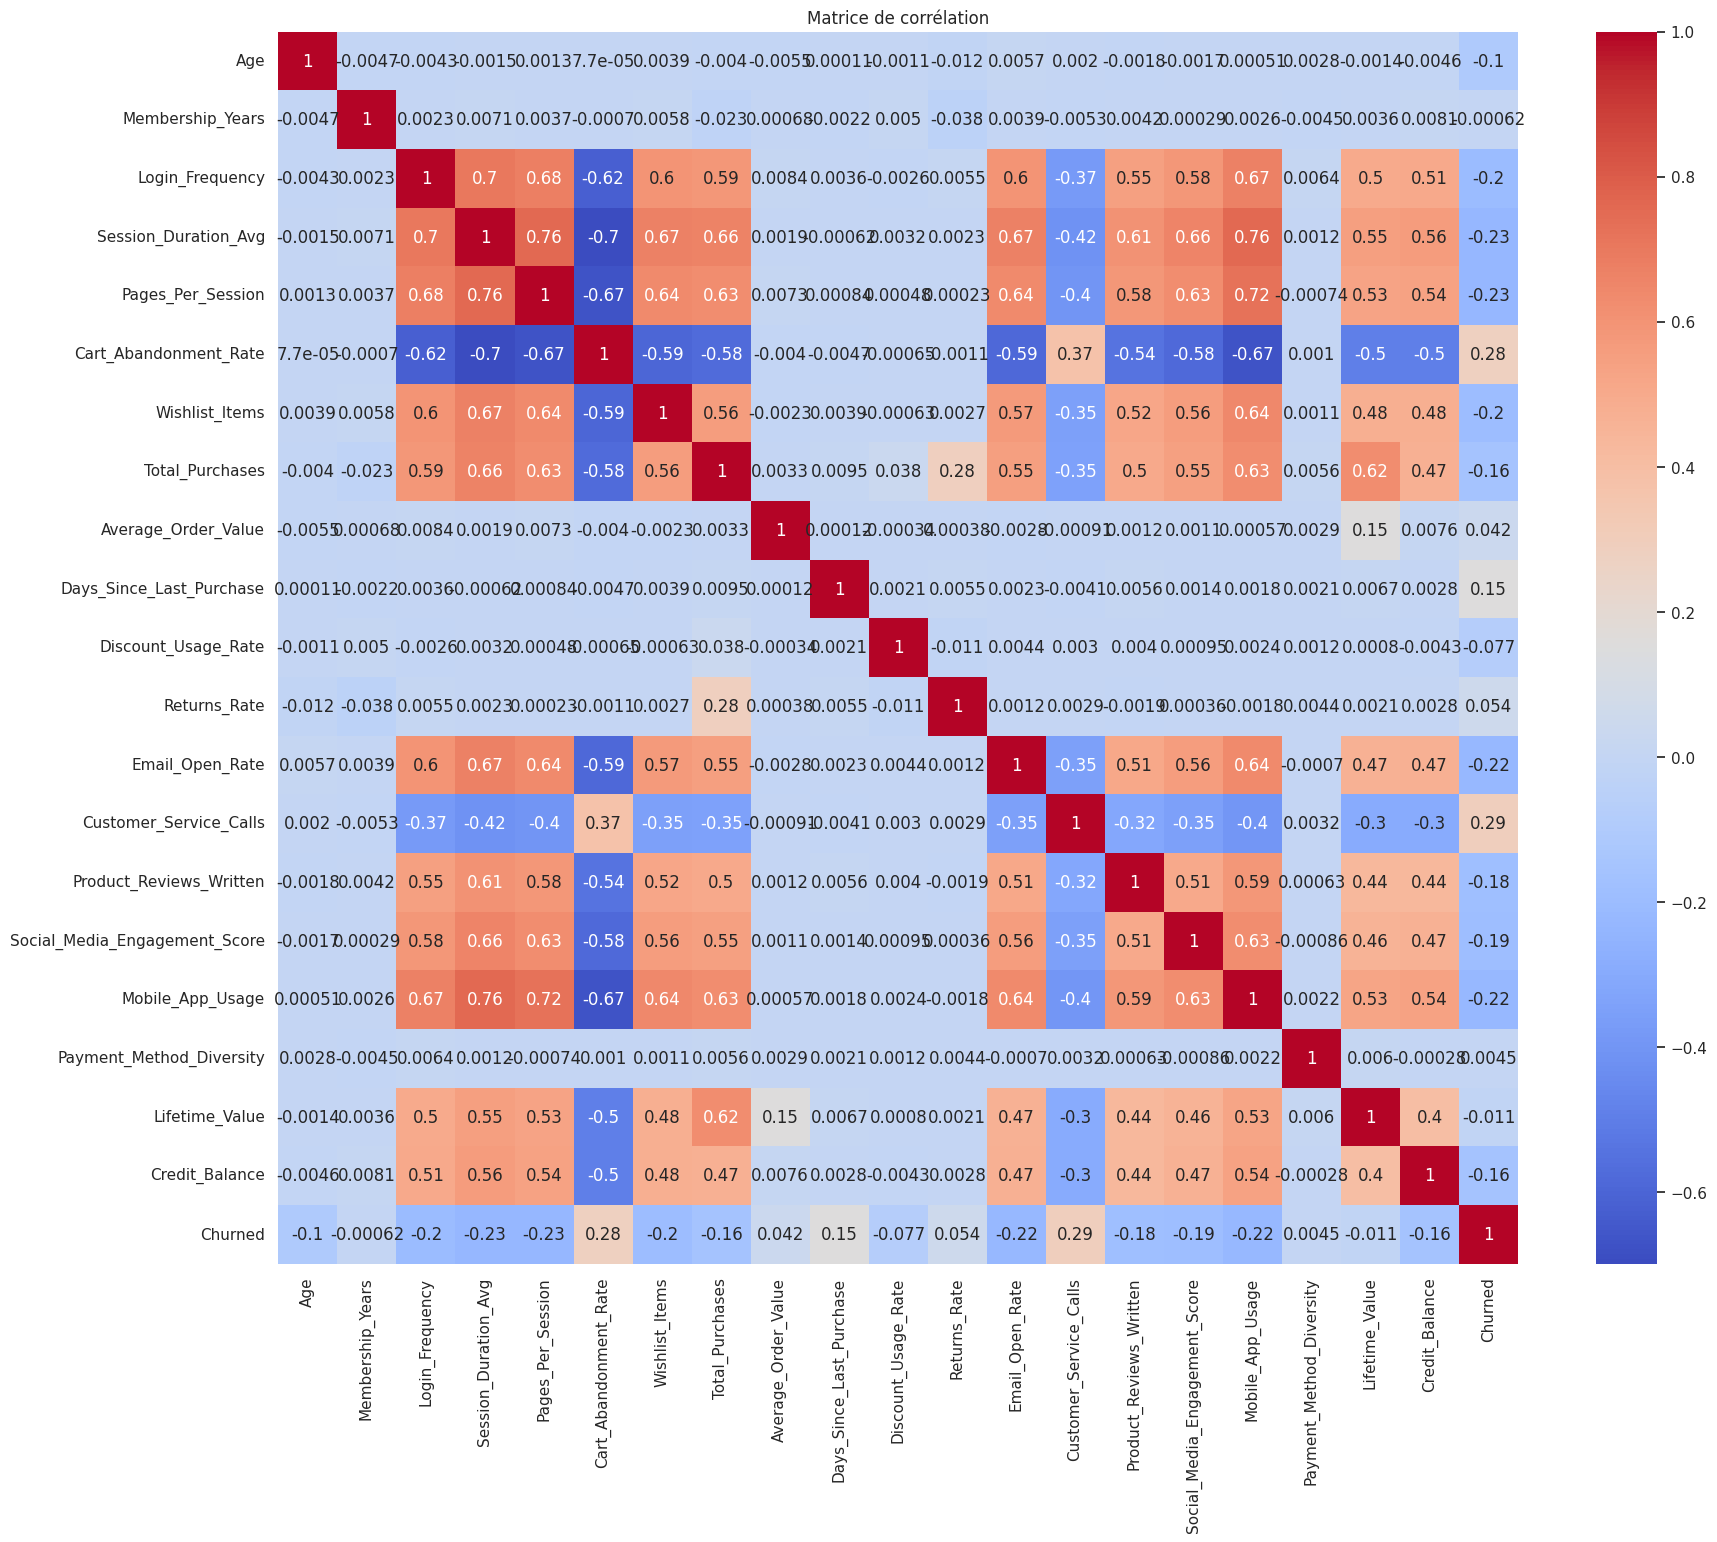

In [ ]:
plt.figure(figsize=(20, 16))
sns.heatmap(
    df[numerical_cols.tolist() + ["Churned"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Matrice de corrélation")
plt.show()


* Corrélations avec la variable cible Churned

Toutes les corrélations sont faibles (-0.29 à +0.29), confirmant que aucune variable seule ne prédit fortement le churn.

**Variables avec signal modéré :**

**Engagement**: Login_Frequency (-0.23), Email_Open_Rate (-0.29), Session_Duration_Avg (-0.23)

Comportement client : Cart_Abandonment_Rate (+0.28), Customer_Service_Calls (+0.29)

**Achats** : Total_Purchases (-0.16), Lifetime_Value (-0.11)

=> Churn dépend de combinaisons multivariées ou relations non linéaires, pas d’une seule variable.

* Variables démographiques (Age, Membership_Years)

    - Corrélations très faibles avec toutes les autres variables.

    - Indépendantes et sans multicolinéarité.

=> Rôle limité dans la prédiction du churn (cohérent avec les boxplots).

* Variables d’engagement/comportement

Corrélations positives modérées à fortes entre elles (cluster d’engagement) :

     - Session_Duration_Avg ↔ Pages_Per_Session : +0.76

     - Login_Frequency ↔ Session_Duration_Avg : +0.70

     - Mobile_App_Usage ↔ Session_Duration_Avg : +0.72

=> clients actifs sur un canal le sont souvent sur les autres.

=> Multicolinéarité possible → envisager score d’engagement composite pour le modeling.

* Variables d’achat / valeur (**Total_Purchases, Average_Order_Value, Lifetime_Value, Credit_Balance, Days_Since_Last_Purchase, Discount_Usage_Rate, Returns_Rate**)

->Corrélations logiques :

    - Total_Purchases ↔ Lifetime_Value : +0.70 (plus d’achats = plus de valeur client)

    - Credit_Balance ↔ Lifetime_Value : +0.62

    - Days_Since_Last_Purchase ↔ Total_Purchases : -0.42 (clients récents achètent plus)

=> Multicolinéarité possible → certaines features peuvent être combinées ou normalisées.

* Variables de support / marketing (**Customer_Service_Calls, Product_Reviews_Written, Cart_Abandonment_Rate**)

->Corrélations faibles à modérées avec engagement ou achats :

    - Cart_Abandonment_Rate ↔ Login_Frequency : -0.62 (plus d’abandons = moins d’engagement)

    - Customer_Service_Calls ↔ Returns_Rate : +0.37 (insatisfaction liée)

    - Utiles pour feature engineering : ex. ratio appels/achats, score frustration.

* Autres variables (Payment_Method_Diversity)

-> Faiblement corrélée à tout (<0.20).

    - Variable indépendante, peu d’impact linéaire sur le churn.

Synthèse globale :

**=> Churn = phénomène multifactoriel, aucune variable seule n’explique le départ d’un client.**

**=> Engagement, comportement d’achat et insatisfaction sont les clusters les plus informatifs.**

=> Nécessité de modèles non linéaires ou combinant plusieurs variables (arbres de décision, gradient boosting, XGBoost, Random Forest, etc.).

=> Multicolinéarité présente dans certains clusters → penser à réduction de dimension ou features composites pour la stabilité du modèle.